In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('hr.csv')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


# Data Inspection and Profiling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


Department, Left, and salary are the categorical columns and remaining are numerical columns. After data inspection work_accident and promotion_last_5years should also be converted to object as categorical columns.

In [ ]:
df.isnull().sum()*100/len(df)

satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      0.000000
time_spend_company        0.000000
Work_accident             0.000000
left                      0.000000
promotion_last_5years     0.000000
Department                0.000000
salary                    0.193282
age                      79.472141
dtype: float64

As Age has more 79.4% data missing deleting the columns would be better. As for salary we will use mode to impute the data because it is a categorical column.

<Axes: >

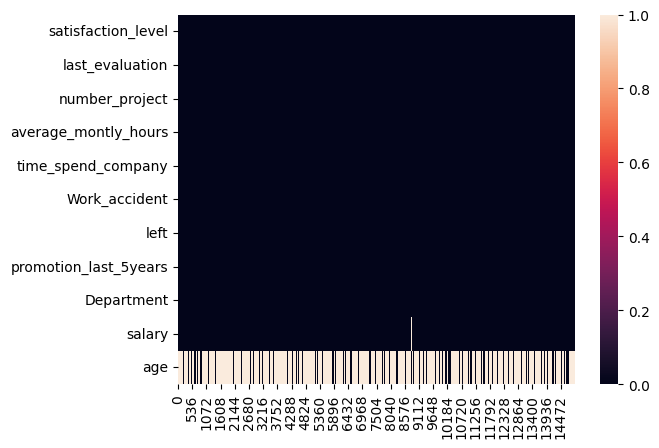

In [ ]:
# visualizing missing values using heatmap
sns.heatmap(df.isnull().transpose())

In [ ]:
df.drop(columns = ['age'],inplace = True)

In [ ]:
df['Work_accident'] = df['Work_accident'].astype('object')

In [ ]:
df['promotion_last_5years'] = df['promotion_last_5years'].astype('object')

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,15004.000000,15004.000000,15004.000000,15004.000000,15004.000000
mean,0.612871,0.716096,3.802919,201.044655,3.497934
std,0.248628,0.171163,1.232550,49.937662,1.460012
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [ ]:
df.describe(include = 'object')

,Work_accident,left,promotion_last_5years,Department,salary
count,15004,15004,15004,15004,14975
unique,2,3,2,10,3
top,0,0,0,sales,low
freq,12835,11428,14685,4140,7289


In [ ]:
df.left.value_counts()

left
0    11428
1     3572
?        4
Name: count, dtype: int64

### 4 rows are now known if the left or not. As these 4 rows are no so much we also drop these rows.

In [ ]:
df[df['left'] == '?']

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
7864,0.72,0.67,5,210,2,0,?,0,management,medium
8309,0.96,0.54,3,198,3,0,?,0,support,low
10830,0.55,0.96,3,194,3,0,?,0,product_mng,medium
12652,0.96,0.75,4,177,2,0,?,0,IT,low


In [ ]:
df = df[df['left'] != '?']

In [ ]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident             object
left                      object
promotion_last_5years     object
Department                object
salary                    object
dtype: object

In [ ]:
df['salary'].isnull().sum()

29

As the no of missing rows of salary data is about 2% deleting the rows will be better.

In [ ]:
df.dropna(subset = ['salary'],inplace = True)

<ipython-input-17-4be6eede8241>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset = ['salary'],inplace = True)


In [ ]:
df.corr(numeric_only = True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.104641,-0.143046,-0.019894,-0.100622
last_evaluation,0.104641,1.000000,0.349337,0.340075,0.131555
number_project,-0.143046,0.349337,1.000000,0.417360,0.196924
average_montly_hours,-0.019894,0.340075,0.417360,1.000000,0.127640
time_spend_company,-0.100622,0.131555,0.196924,0.127640,1.000000


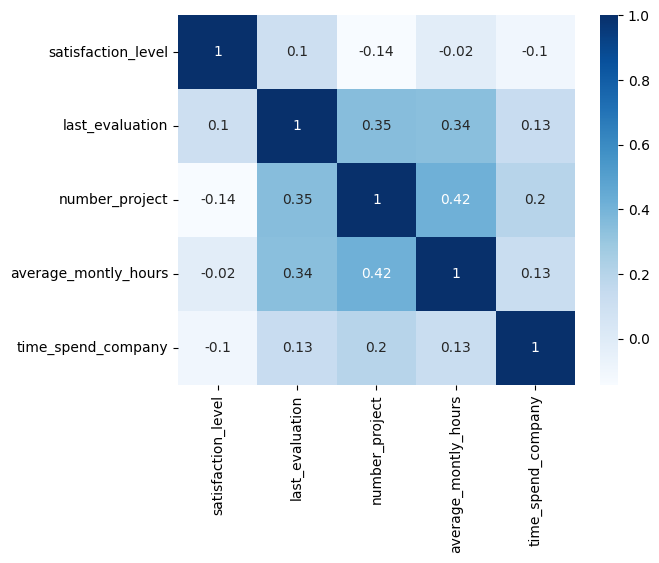

In [ ]:
sns.heatmap(df.corr(numeric_only = True),annot = True,cmap = 'Blues');

# EDA

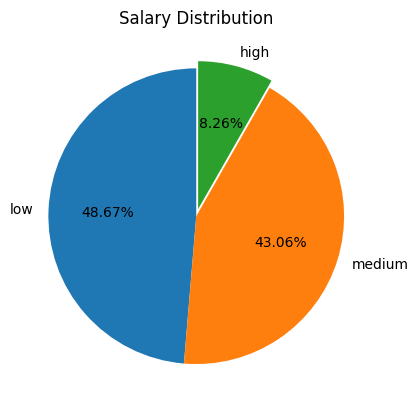

In [ ]:
x = df.salary.value_counts()
plt.pie(x.values, labels = x.index,autopct = '%.2f%%',startangle = 90,explode = [0,0,.05])
plt.title('Salary Distribution')
plt.show()

In [ ]:
fig = px.histogram(df, x= 'satisfaction_level', color = 'salary',title='Satisfaction Level Distribution')
fig.update_layout(bargap = 0.1)

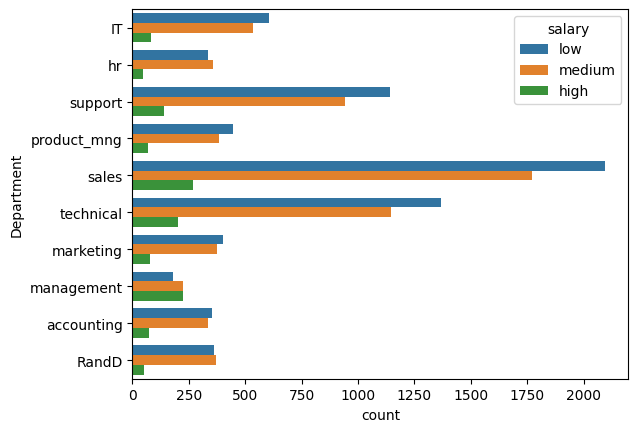

In [ ]:
sns.countplot(y = df.Department,hue = df.salary);

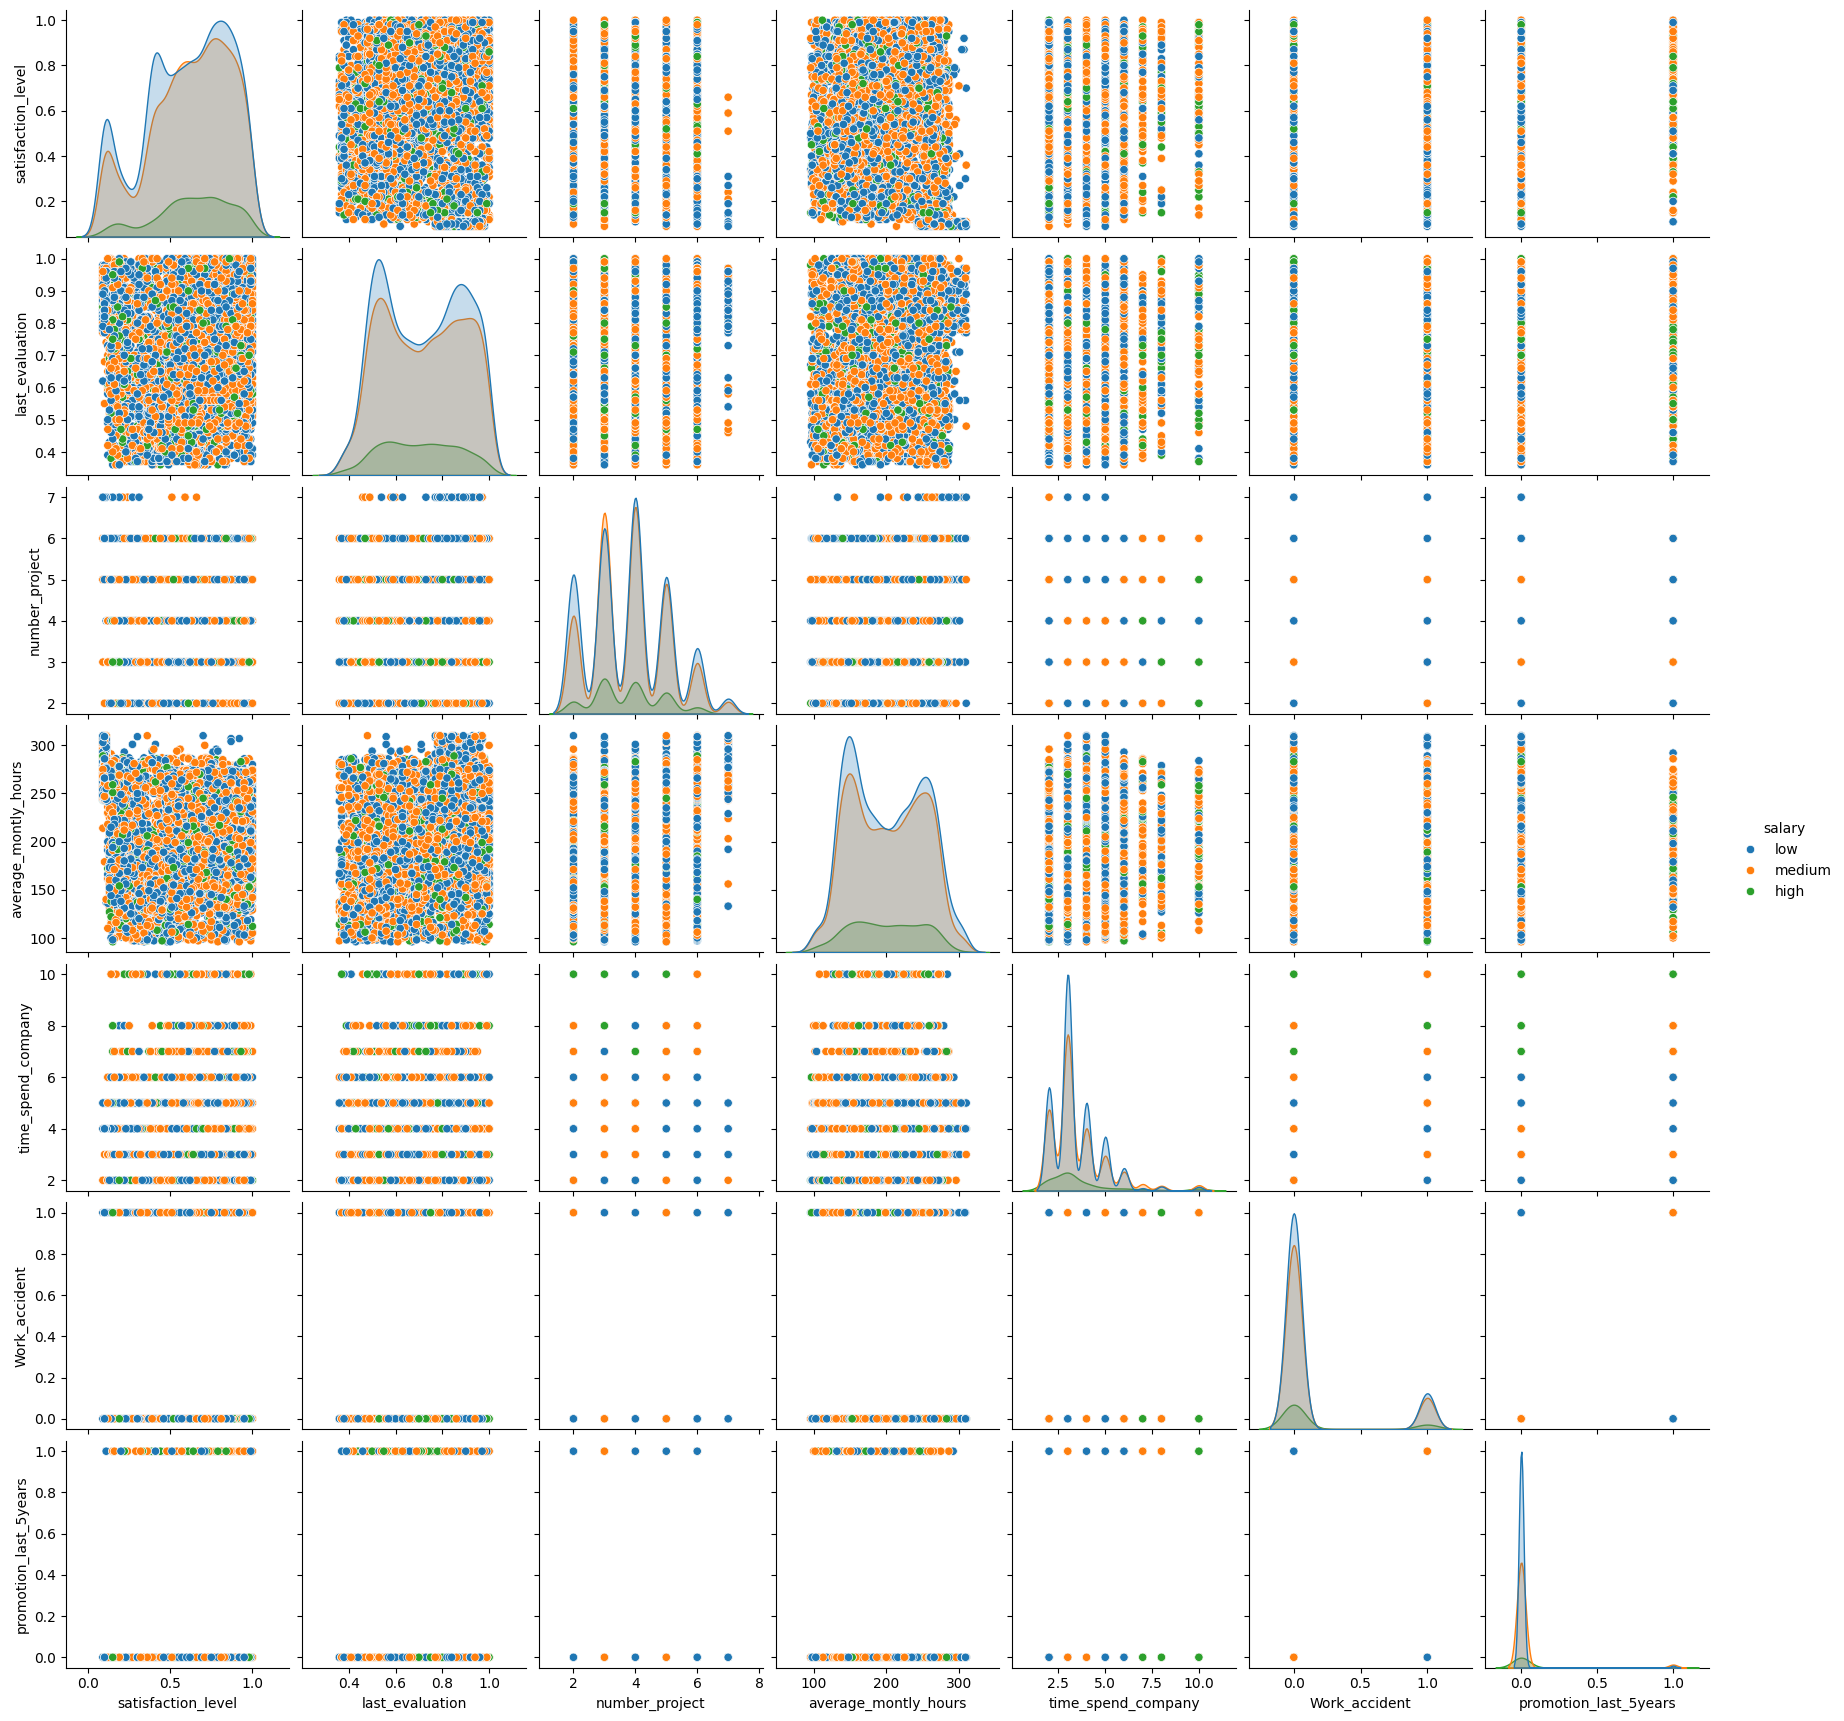

In [ ]:
sns.pairplot(df,hue = 'salary');

In [ ]:
list(df.columns)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

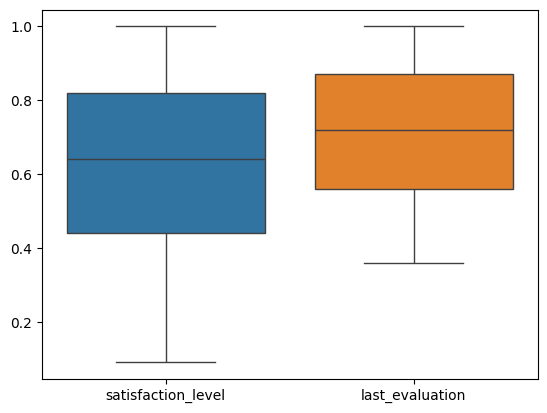

In [ ]:
sns.boxplot(df[['satisfaction_level','last_evaluation']]);
plt.show()

In [ ]:
fig = px.histogram(df[['average_montly_hours']],marginal = 'box')
fig.update_layout(bargap = 0.1)


In [ ]:
px.box(df[['number_project','time_spend_company']])

# Identifying Features and Labels

In [ ]:
X = df.iloc[:,1:]
y = df.satisfaction_level

In [ ]:
X

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.79,2,175,5,0,0,0,IT,low
1,0.49,2,155,3,0,1,0,hr,medium
2,0.45,2,154,3,1,1,0,support,medium
3,0.73,6,256,4,0,0,0,product_mng,high
4,0.54,5,275,4,1,0,0,sales,high
...,...,...,...,...,...,...,...,...,...
14999,0.66,5,187,2,0,0,0,sales,medium
15000,0.84,3,145,3,1,0,0,support,low
15001,0.41,3,138,3,1,0,0,technical,medium
15002,0.58,3,148,2,1,0,0,technical,low


In [ ]:
y

0        0.24
1        0.40
2        0.45
3        0.46
4        0.14
         ... 
14999    0.71
15000    0.75
15001    0.32
15002    0.62
15003    0.81
Name: satisfaction_level, Length: 14971, dtype: float64

# Encoding

In [ ]:
X_feature = pd.get_dummies(data = X,columns = ['Department','left','Work_accident','promotion_last_5years'],dtype=int, drop_first = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_feature['salary'] = le.fit_transform(df['salary'])

In [ ]:
X_feature

,last_evaluation,number_project,average_montly_hours,time_spend_company,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,left_1,Work_accident_1,promotion_last_5years_1
0,0.79,2,175,5,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0.49,2,155,3,2,0,0,1,0,0,0,0,0,0,1,0,0
2,0.45,2,154,3,2,0,0,0,0,0,0,0,1,0,1,1,0
3,0.73,6,256,4,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.54,5,275,4,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14999,0.66,5,187,2,2,0,0,0,0,0,0,1,0,0,0,0,0
15000,0.84,3,145,3,1,0,0,0,0,0,0,0,1,0,0,1,0
15001,0.41,3,138,3,2,0,0,0,0,0,0,0,0,1,0,1,0
15002,0.58,3,148,2,1,0,0,0,0,0,0,0,0,1,0,1,0


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, y_train.shape

((11976, 17), (11976,))

In [ ]:
X_test.shape, y_test.shape

((2995, 17), (2995,))

# Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


# Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred)
mse = mean_squared_error(y_true = y_test, y_pred = y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"Mean Absolute Error = {round(mae, 5)}")
print(f"Mean Squared Error = {round(mse, 5)}")
print(f"r2_score = {round(r2, 5)}")


Mean Absolute Error = 0.18063
Mean Squared Error = 0.05011
r2_score = 0.17664


# SVC

In [ ]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred)
mse = mean_squared_error(y_true = y_test, y_pred = y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"Mean Absolute Error = {round(mae, 5)}")
print(f"Mean Squared Error = {round(mse, 5)}")
print(f"r2_score = {round(r2, 5)}")


Mean Absolute Error = 0.17687
Mean Squared Error = 0.04869
r2_score = 0.19987


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [1,2,3,4,5]
}
model = KNeighborsRegressor()
clf = GridSearchCV(model, param_grid = param_grid, cv =5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]})

In [ ]:
be = clf.best_estimator_
be.fit(X_train,y_train)
y_pred = be.predict(X_test)

# Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred)
mse = mean_squared_error(y_true = y_test, y_pred = y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"Mean Absolute Error = {round(mae, 5)}")
print(f"Mean Squared Error = {round(mse, 5)}")
print(f"r2_score = {round(r2, 5)}")


Mean Absolute Error = 0.14656
Mean Squared Error = 0.04004
r2_score = 0.34201


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred)
mse = mean_squared_error(y_true = y_test, y_pred = y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"Mean Absolute Error = {round(mae, 5)}")
print(f"Mean Squared Error = {round(mse, 5)}")
print(f"r2_score = {round(r2, 5)}")


Mean Absolute Error = 0.18065
Mean Squared Error = 0.05011
r2_score = 0.17664


# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred)
mse = mean_squared_error(y_true = y_test, y_pred = y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"Mean Absolute Error = {round(mae, 5)}")
print(f"Mean Squared Error = {round(mse, 5)}")
print(f"r2_score = {round(r2, 5)}")


Mean Absolute Error = 0.20453
Mean Squared Error = 0.06086
r2_score = -0.00011


### For random forest regressor I am going to use a function to find the best parameters

In [ ]:
from sklearn.ensemble import RandomForestRegressor
def best_nest(n):
  model = RandomForestRegressor(n_estimators = n,random_state = 40)
  model.fit(X_train, y_train)
  train_acc = model.score(X_train, y_train)
  test_acc = model.score(X_test, y_test)
  return {'n_estimators':n,'Training Accuracy':train_acc,'Testing Accuracy':test_acc}


In [ ]:
new_df = pd.DataFrame([best_nest(n) for n in range(100, 501, 100)])
new_df

,n_estimators,Training Accuracy,Testing Accuracy
0,100,0.934976,0.535214
1,200,0.935885,0.537003
2,300,0.936443,0.538650
3,400,0.936729,0.539459
4,500,0.936871,0.539341


In [ ]:
from sklearn.ensemble import RandomForestRegressor
def best_max_depth(n):
  model = RandomForestRegressor(max_depth = n,random_state = 40)
  model.fit(X_train, y_train)
  train_acc = model.score(X_train, y_train)
  test_acc = model.score(X_test, y_test)
  return {'n_estimators':n,'Training Accuracy':train_acc,'Testing Accuracy':test_acc}


In [ ]:
new_df = pd.DataFrame([best_nest(n) for n in range(1, 6)])
new_df

,n_estimators,Training Accuracy,Testing Accuracy
0,1,0.650755,0.068074
1,2,0.790646,0.305046
2,3,0.842771,0.370069
3,4,0.867756,0.421281
4,5,0.883531,0.445630


In [ ]:
from sklearn.ensemble import RandomForestRegressor
def best_min_samples_split(n):
  model = RandomForestRegressor(min_samples_split = n,random_state = 40)
  model.fit(X_train, y_train)
  train_acc = model.score(X_train, y_train)
  test_acc = model.score(X_test, y_test)
  return {'n_estimators':n,'Training Accuracy':train_acc,'Testing Accuracy':test_acc}


In [ ]:
new_df = pd.DataFrame([best_nest(n) for n in range(1, 4)])
new_df

,n_estimators,Training Accuracy,Testing Accuracy
0,1,0.650755,0.068074
1,2,0.790646,0.305046
2,3,0.842771,0.370069


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 400, max_depth = 5,min_samples_split = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred)
mse = mean_squared_error(y_true = y_test, y_pred = y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"Mean Absolute Error = {round(mae, 5)}")
print(f"Mean Squared Error = {round(mse, 5)}")
print(f"r2_score = {round(r2, 5)}")

Mean Absolute Error = 0.14077
Mean Squared Error = 0.03513
r2_score = 0.42271


# After some hyperparameter tuning a many models we have got the best r2 score for Random Forest Regressor in this dataset.